In [93]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


In [94]:
''' high vegetation = 21-14
    zero vegetation = 15_23
'''

' high vegetation = 21-14\n    zero vegetation = 15_23\n'

In [95]:
sub_image1 = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\sub_images\\RUH_2018-12-15_21_13.npy"
sub_image2 = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\sub_images\\RUH_2023-12-19_21_13.npy"

sub_image1 = np.load(sub_image1)
sub_image2 = np.load(sub_image2)

In [96]:
# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((sub_image1 > threshold) | (sub_image2 > threshold), sub_image2 - sub_image1, 0)

change_detection

array([[ 0.        ,  0.        ,  0.        , ..., -0.03552448,
         0.        , -0.03072844],
       [ 0.        ,  0.        ,  0.        , ..., -0.01595312,
         0.        , -0.04796185],
       [ 0.        ,  0.        ,  0.        , ..., -0.02682605,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.07775716, -0.08116215],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.08244626],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.07571135]], dtype=float32)

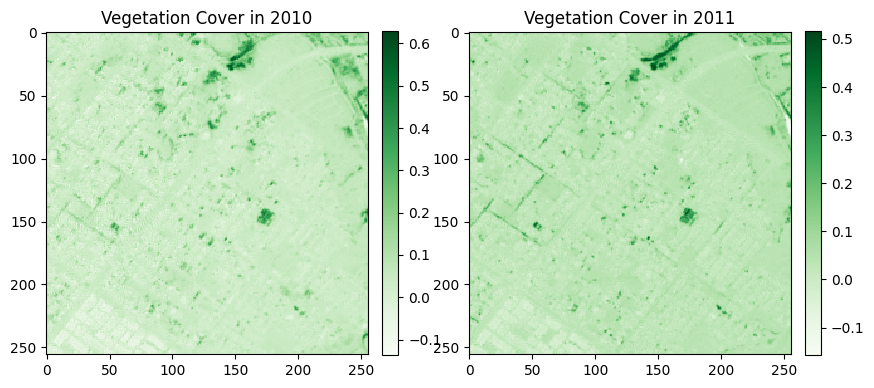

In [97]:
# Plotting the vegetation cover for 2010 and 2011 side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Vegetation cover for 2010
cax_2010 = axs[0].imshow(sub_image1, cmap='Greens', interpolation='nearest')
fig.colorbar(cax_2010, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Vegetation Cover in 2010')


# Vegetation cover for 2011
cax_2011 = axs[1].imshow(sub_image2, cmap='Greens', interpolation='nearest')
fig.colorbar(cax_2011, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Vegetation Cover in 2011')


plt.show()


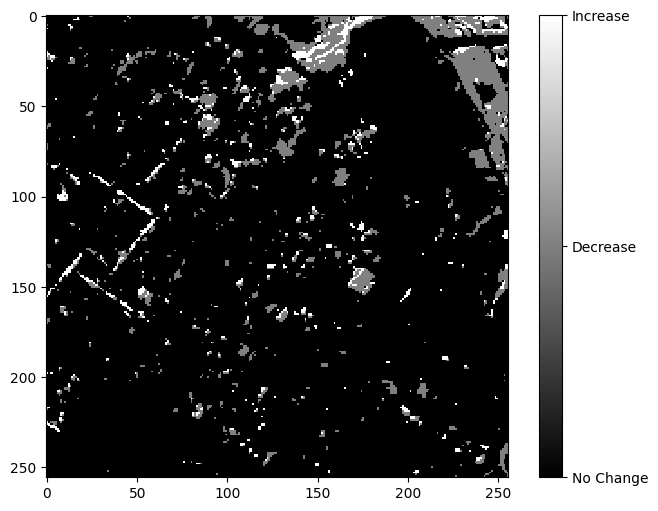

In [98]:
# Initializing an array for categorized changes
categorized_changes = np.zeros_like(change_detection)
# Increase in vegetation cover (positive change)
categorized_changes[change_detection > 0] = 1  # White

# Decrease in vegetation cover (negative change)
categorized_changes[change_detection < 0] = 0.5  # Gray

# Plotting the categorized changes
plt.figure(figsize=(8, 6))
plt.imshow(categorized_changes, cmap='gray', interpolation='nearest')
plt.colorbar( ticks=[0, 0.5, 1], format=lambda x, _: {0: 'No Change', 0.5: 'Decrease', 1: 'Increase'}.get(x, ''))
plt.show()

In [99]:
from matplotlib.colors import ListedColormap

def categorize_change(value):
    if 0 < value <= 0.33:
        return 1
    elif 0.33 < value <= 0.66:
        return 2
    elif 0.66 < value <= 1:
        return 3
    elif -0.33 <= value < 0:
        return -1
    elif -0.66 <= value < -0.33:
        return -2
    elif -1 <= value < -0.66:
        return -3
    else:
        return 0
    
# Custom colormap: black, yellow-orange-red for negatives, black, lightblue-green-dark green for positives
colors = ['red', 'orange', 'yellow', 'black', 'lightblue', 'lightgreen', 'darkgreen']
cmap = ListedColormap(colors)
bounds = [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
norm = plt.Normalize(min(bounds), max(bounds))


# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((sub_image1 > threshold) | (sub_image2 > threshold), sub_image2 - sub_image1, 0)

# Vectorizing the categorize_change function to apply it element-wise
categorize_change_vectorized = np.vectorize(categorize_change)

# Applying the categorization to the change_detection array
categorized_changes = categorize_change_vectorized(change_detection)

print(categorized_changes)


[[ 0  0  0 ... -1  0 -1]
 [ 0  0  0 ... -1  0 -1]
 [ 0  0  0 ... -1  0  0]
 ...
 [ 0  0  0 ...  0 -1 -1]
 [ 0  0  0 ...  0  0 -1]
 [ 0  0  0 ...  0  0 -1]]


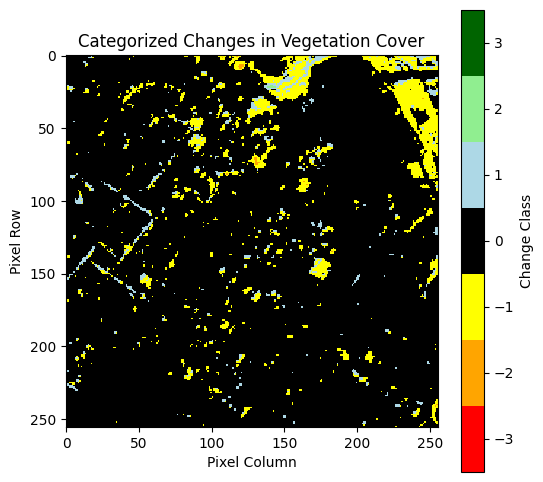

In [100]:

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(categorized_changes, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=np.arange(-3, 4), label='Change Class')
plt.title('Categorized Changes in Vegetation Cover')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()